# <font color='blue'> **Clasificación**
<font color='blue'> Preprocesamiento y clasificación para el conjunto de datos LingSpam.

 ##  **1. Importar dataset**
 En primer lugar vamos a importar los archivos donde se encuentran nuestros datos. Cada uno posee una estructura distintas, por lo que tendremos que uniformizarlos.
A continuación combinaremos los tres datasets para formar nuestro corpus de correos spam.

In [4]:
#INSTALAR PAQUETES
#!pip install pandas
#!pip install wordcloud
#!pip install imbalanced-learn
#!pip install seaborn
#!pip install nltk

#IMPORTAR PAQUETES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS #Lista predeterminada de palabras vacías en inglés
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS #Lista predeterminada de palabras vacías en inglés
import string
import re  #Biblioteca para utilizar expresiones regulares
import nltk #Biblioteca para técnicas de PLN
from nltk.tokenize import word_tokenize
nltk.download('punkt') #Datos para tokenizar
from imblearn.over_sampling import RandomOverSampler
from nltk import bigrams, trigrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from urlextract import URLExtract

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\monic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\monic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Leer los datos desde el PC**

In [6]:
#Para leer desde el pc
#data1=pd.read_csv("../datos/enronSpamSubset.csv")
data2=pd.read_csv("../datos/lingSpam.csv")
#data3=pd.read_csv("../datos/completeSpamAssassin.csv")

## **2. Preprocesamiento**

Tras el análisis descriptivo y exploratorio del problema realizado en Visualizacion.ipynb, hemos comprendido mejor cómo se comportan nuestros datos. Ahora procedemos a la transformación de estos a una estructura que permita a los algoritmos de clasificación llegar a su máxima eficiencia.
Dicho preprocesamiento se divide en dos:
- **Limpieza y representación de los datos:** ya explicado detenidamente durante la fase de visualización
- **Transformación de los datos:** realizaremos una selección de características, un balanceo de clases y la vectorización de los términos en un formato aceptable para los algoritmos de clasificación que vamos a aplicar.

In [9]:
#data1.info()

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


In [11]:
#data3.info()

Modificamos la estructura de los datos para que tengan únicamente 2 columnas: el cuerpo del mensaje (Body) y su etiqueta (Label).

In [13]:
#Quitamos para cada dataset las columnas irrelevantes
#data1.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
data2.drop("Unnamed: 0",inplace=True,axis=1)
#data3.drop("Unnamed: 0",inplace=True,axis=1)

### **Limpieza y representación de los datos**
Realizamos la misma limpieza de datos que en Visualización.ipynb

In [15]:
#Función que toma un texto y sustituye las contracciones por la expresión completa
def quitar_contracciones(texto):
    #Definimos un diccionario de contracciones y sus expansiones completas
    contracciones = {
        r"ain\'t": "am not",
        r"aren\'t": "are not",
        r"can\'t": "cannot",
        r"can\'t\'ve": "cannot have",
        r"\'cause": "because",
        r"could\'ve": "could have",
        r"couldn\'t": "could not",
        r"couldn\'t\'ve": "could not have",
        r"didn\'t": "did not",
        r"doesn\'t": "does not",
        r"don\'t": "do not",
        r"hadn\'t": "had not",
        r"hadn\'t\'ve": "had not have",
        r"hasn\'t": "has not",
        r"haven\'t": "have not",
        r"he\'d": "he had",
        r"he\'d\'ve": "he would have",
        r"he\'ll": "he will",
        r"he\'ll\'ve": "he will have",
        r"he\'s": "he is",
        r"how\'d": "how did",
        r"how\'d\'y": "how do you",
        r"how\'ll": "how will",
        r"how\'s": "how is",
        r"i\'d": "i had",
        r"i\'d\'ve": "i would have",
        r"i\'ll": "i will",
        r"i\'ll\'ve": "i will have",
        r"i\'m": "i am",
        r"i\'ve": "i have",
        r"isn\'t": "is not",
        r"it\'d": "it had",
        r"it\'d\'ve": "it would have",
        r"it\'ll": "it will",
        r"it\'ll\'ve": "it will have",
        r"it\'s": "it is",
        r"let\'s": "let us",
        r"ma\'am": "madam",
        r"mayn\'t": "may not",
        r"might\'ve": "might have",
        r"mightn\'t": "might not",
        r"mightn\'t\'ve": "might not have",
        r"must\'ve": "must have",
        r"mustn\'t": "must not",
        r"mustn\'t\'ve": "must not have",
        r"needn\'t": "need not",
        r"needn\'t\'ve": "need not have",
        r"o\'clock": "of the clock",
        r"oughtn\'t": "ought not",
        r"oughtn\'t\'ve": "ought not have",
        r"shan\'t": "shall not",
        r"sha\'n\'t": "shall not",
        r"shan\'t\'ve": "shall not have",
        r"she\'d": "she had",
        r"she\'d\'ve": "she would have",
        r"she\'ll": "she will",
        r"she\'ll\'ve": "she will have",
        r"she\'s": "she is",
        r"should\'ve": "should have",
        r"shouldn\'t": "should not",
        r"shouldn\'t\'ve": "should not have",
        r"so\'ve": "so have",
        r"so\'s": "so as",
        r"that\'d": "that would",
        r"that\'d\'ve": "that would have",
        r"that\'s": "that is",
        r"there\'d": "there had",
        r"there\'d\'ve": "there would have",
        r"there\'s": "there is",
        r"they\'d": "they had",
        r"they\'d\'ve": "they would have",
        r"they\'ll": "they will",
        r"they\'ll\'ve": "they will have",
        r"they\'re": "they are",
        r"they\'ve": "they have",
        r"to\'ve": "to have",
        r"wasn\'t": "was not",
        r"we\'d": "we had",
        r"we\'d\'ve": "we would have",
        r"we\'ll": "we will",
        r"we\'ll\'ve": "we will have",
        r"we\'re": "we are",
        r"we\'ve": "we have",
        r"weren\'t": "were not",
        r"what\'ll": "what will",
        r"what\'ll\'ve": "what will have",
        r"what\'re": "what are",
        r"what\'s": "what is",
        r"what\'ve": "what have",
        r"when\'s": "when is",
        r"when\'ve": "when have",
        r"where\'d": "where did",
        r"where\'s": "where is",
        r"where\'ve": "where have",
        r"who\'ll": "who will",
        r"who\'ll\'ve": "who will have",
        r"who\'s": "who is",
        r"who\'ve": "who have",
        r"why\'s": "why is",
        r"why\'ve": "why have",
        r"will\'ve": "will have",
        r"won\'t": "will not",
        r"won\'t\'ve": "will not have",
        r"would\'ve": "would have",
        r"wouldn\'t": "would not",
        r"wouldn\'t\'ve": "would not have",
        r"y\'all": "you all",
        r"y\'all\'d": "you all would",
        r"y\'all\'d\'ve": "you all would have",
        r"y\'all\'re": "you all are",
        r"y\'all\'ve": "you all have",
        r"you\'d": "you had",
        r"you\'d\'ve": "you would have",
        r"you\'ll": "you will",
        r"you\'ll\'ve": "you will have",
        r"you\'re": "you are",
        r"you\'ve": "you have"
    }

    #Sustituimos las contracciones en el texto
    for contraccion, expansion in contracciones.items():
        texto = re.sub(contraccion, expansion, texto)

    return texto

In [16]:
def limpieza(dataset):
    data = dataset.copy() #Creamos una copia explícita para evitar errores

    #Buscamos y eliminamos las instancias duplicadas
    data.drop_duplicates(inplace=True)

    #Reemplazamos los espacios en blanco con NaN.
    #Para ello, usamos una expresión regular para reemplazar cualquier cadena que contenga únicamente espacios en blanco
    data['Body'] = data['Body'].replace(r'^\s*$', pd.NA, regex=True)

    # Eliminamos los correos con valores nulos
    data.dropna(subset=['Body'], inplace=True)

    # Quitamos mayúsculas
    data['Body'] = data['Body'].str.lower()

    # Reemplazamos las URLs por el token 'URL'
    #url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    #data['Body'] = data['Body'].apply(lambda x: re.sub(url_pattern, 'URL', x))

    #OTRA OPCIÓN: URLExtract
    extractor = URLExtract()
    data['Body'] = data['Body'].apply(lambda x: ' '.join(['URL' if extractor.has_urls(word) else word for word in x.split()]))
    

    #Antes de eliminar los signos de puntuación, eliminamos las contracciones del inglés para que no queden letras sueltas
    data['Body'] = data['Body'].apply(quitar_contracciones)

    # Eliminamos signos de puntuación
    data['Body'] = data['Body'].str.replace(f'[{string.punctuation}]', ' ', regex=True)

    # Eliminamos todos los elementos que no sean caracteres alfabéticos
    #pattern = "[^a-zA-Z0-9]"
    pattern = "[^a-zA-Z ]"  # Espacio incluido para no eliminar los espacios entre palabras
    data['Body'] = data['Body'].apply(lambda x: re.sub(pattern, ' ', x))

    # Creamos una lista personalizada de palabras vacías o stop words
    stop_words_list = list(ENGLISH_STOP_WORDS)
    stop_words_list += ["subject"]

    # Eliminamos las stop words
    data['Body'] = data['Body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words_list]))

    # Eliminamos términos con longitud menor que 2
    data['Body'] = data['Body'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

    return data


In [17]:
#data1_clean=limpieza(data1)
data2_clean=limpieza(data2)
#data3_clean=limpieza(data3)

In [18]:
data_clean = data2_clean

# Verificar la información del DataFrame
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2591 entries, 0 to 2604
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    2591 non-null   object
 1   Label   2591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.7+ KB
None


### **Selección de características**

Debido a que cuando vectoricemos el conjunto de datos, las características serán las palabras y los valores de estas la frecuencia en el correo, queremos quitar **características irrelevantes** eliminado las palabras cuya frecuencia total sea casi nula, pues no aportan gran cosa.

Realizamos esta selección antes que nada, pues al aplicar el balanceo de clases tendremos muchas más palabras y esto puede afectar al rendimiento, y también puede distorsionar la frecuencia real de los términos.

In [20]:
def seleccion_caracteristicas(data):
    #Contar frecuencia de cada palabra en todo el dataset
    all_words = ' '.join(data['Body']).split()
    word_freq = Counter(all_words)
    
    #Filtrar palabras con frecuencia menor igual que 5
    data['Body'] = data['Body'].apply(lambda x: ' '.join([word for word in x.split() if word_freq[word] > 5]))

    #Mostramos las palabras después del filtrado
    all_words = ' '.join(data['Body']).split()
    word_freq = Counter(all_words)
    # Mostrar los 50 primeros términos y sus frecuencias
    top_words = list(word_freq.items())[:50]
    print(top_words)
    
    return data

In [21]:
# Mostramos los 10 primeros términos y sus frecuencias
data=seleccion_caracteristicas(data_clean)

[('great', 1012), ('time', 4063), ('summer', 724), ('job', 576), ('display', 137), ('boxes', 48), ('credit', 1295), ('applications', 1400), ('need', 1721), ('place', 1746), ('small', 702), ('owner', 102), ('operated', 12), ('stores', 39), ('area', 1278), ('introduce', 126), ('store', 75), ('manager', 111), ('use', 3685), ('effective', 278), ('script', 57), ('tells', 99), ('little', 1062), ('box', 1263), ('save', 562), ('customers', 205), ('hundreds', 328), ('dollars', 403), ('drawing', 69), ('card', 1279), ('business', 2190), ('make', 3250), ('app', 48), ('sent', 1935), ('good', 1304), ('spot', 45), ('counter', 93), ('say', 1157), ('address', 5584), ('company', 611), ('send', 4167), ('commission', 129), ('checks', 320), ('representative', 114), ('earn', 240), ('application', 831), ('came', 343), ('course', 1330), ('profitable', 162), ('plan', 494)]


In [22]:
data

,Body,Label
0,great time summer job display boxes credit app...,1
1,auto insurance rates high dear nlpeople sure l...,1
2,want best economical hunting vacation life wan...,1
3,email million people million email addresses w...,1
4,miss attention warning adults warning adults y...,1
...,...,...
2600,computationally intensive methods quantitative...,0
2601,books survey american linguistics publishing h...,0
2602,wecol western conference linguistics arizona s...,0
2603,euralex revised programme euralex liege belgiu...,0


### **Balanceo de clases**

En la fase de visualización vimos que las clases están bastante desbalanceadas. Para resolver este problema, vamos a aplicar **sobremuestreo**. Para ello, usaremos la función `RandomOverSampler` de la biblioteca `imbalanced-learn`. `RandomOverSampler` va replicando aleatoriamente las instancias de la clase minoritaria hasta alcanzar un equilibrio deseado.

In [24]:
#Función para visualizar la distribución de las clases (para ver si hay desbalanceo)
def distribucion(data, title):
    #Calculo la cantidad de correos electrónicos en cada clase
    class_distribution = data['Label'].value_counts()
    class_distribution = class_distribution.sort_index() #Simplemente para que la clase 0 aparezca primero

    # Visualizar la distribución de las clases
    plt.figure(figsize=(8, 6))
    class_distribution.plot(kind='bar', color= ['#45D2EB', '#FF5733'])
    plt.title(title)
    plt.xlabel('Clase')
    plt.ylabel('Cantidad de Correos Electrónicos')
    plt.xticks(rotation=0)
    plt.show()

    print(class_distribution)

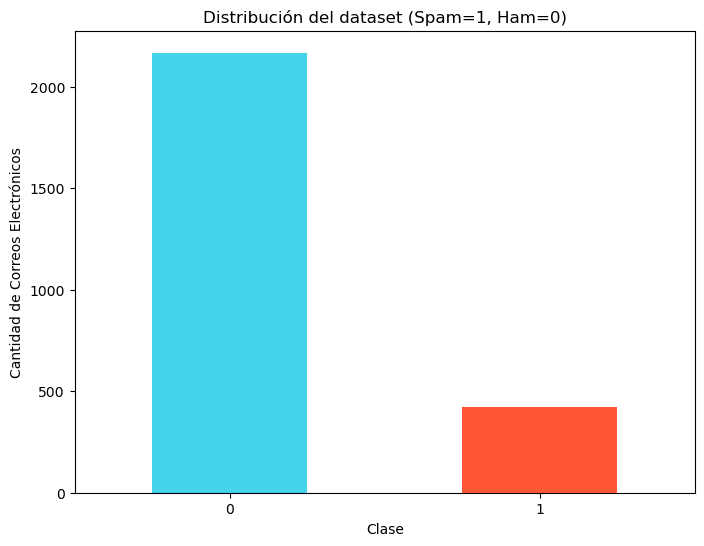

Label
0    2168
1     423
Name: count, dtype: int64


In [25]:
distribucion(data, "Distribución del dataset (Spam=1, Ham=0)")

Procedemos a aplicar sobremuestreo de la clase minoritaria.

In [27]:
def sobremuestreo(data):
    # Separamos las características y las etiquetas
    X = data.drop('Label', axis=1)  # características
    y = data['Label']  # etiquetas
    
    # Aplico el sobremuestreo
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_resampled, y_resampled = oversample.fit_resample(X, y)
    
    # Concatenamos las características y las etiquetas en un nuevo DataFrame
    data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Label'])], axis=1)
    
    # Ahora 'data_resampled' contiene el conjunto de datos con clases balanceadas
    return data_resampled


In [28]:
data_resampled=sobremuestreo(data)

In [29]:
data_resampled

,Body,Label
0,great time summer job display boxes credit app...,1
1,auto insurance rates high dear nlpeople sure l...,1
2,want best economical hunting vacation life wan...,1
3,email million people million email addresses w...,1
4,miss attention warning adults warning adults y...,1
...,...,...
4331,important read carefully message intended adul...,1
4332,service update significant rapid policy change...,1
4333,new capital fm want receive mails click follow...,1
4334,xxx adult sex largest selection hot beautiful ...,1


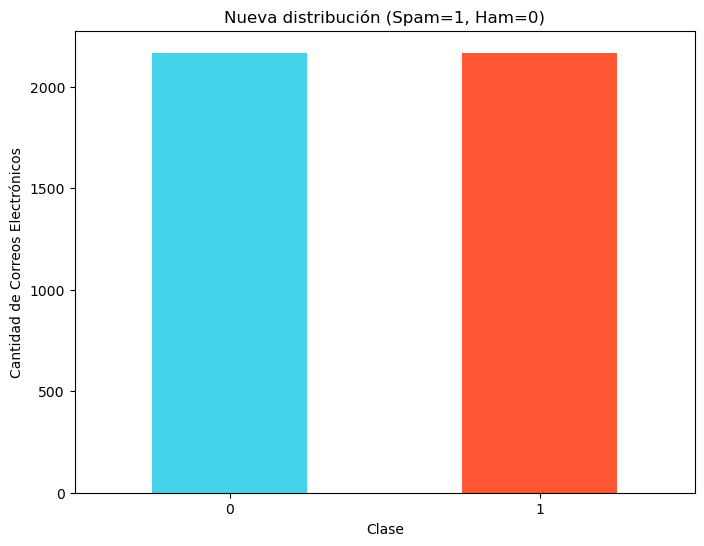

Label
0    2168
1    2168
Name: count, dtype: int64


In [30]:
distribucion(data_resampled, "Nueva distribución (Spam=1, Ham=0)")

### **División del conjunto de datos**

In [32]:
data=data_resampled

In [33]:
#Función para dividir el conjunto de datos en entrenamiento y prueba
def division_datos(data):
    X= data["Body"] #Atributos (sólo hay uno)
    y= data["Label"] #Etiquetas
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42) #Dividimos en conjunto de entrenamiento y de prueba (20% prueba)

    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test= division_datos(data)

### **Vectorización**

In [36]:
#Función para vectorizar el conjunto de datos
def vectorizacion(X_train, X_test, tipo):
    if tipo=="binary":
        vectorizer=CountVectorizer(binary=True) #Vectorización binaria: las características toman el valor 1 si el término aparece, y 0 si no aparece
    elif tipo=="count":
        vectorizer=CountVectorizer() #Vectorización por conteo: las características toman el valor del número de apariciones de cada término
    elif tipo=="tfidf":
        vectorizer=TfidfVectorizer()
    else:
        print("Error. Indica el tipo de vectorización: 'count', 'binary'  o 'tfidf'.")
        return
    X_train=vectorizer.fit_transform(X_train)
    X_test=vectorizer.transform(X_test)
    #print(vectorizer.vocabulary_)

    return X_train, X_test, vectorizer

In [37]:
#Obtenemos los conjuntos de entrenamiento y test aplicándoles los vectorizadores

#Vectorizador para Naive Bayes Bernoulli
#X_train_0, X_test_0, vectorizer_0= vectorizacion(X_train, X_test, "binary") 

#Vectorizador para el resto de modelos
#X_train_1, X_test_1, vectorizer_1= vectorizacion(X_train, X_test, "count") 
X_train_2, X_test_2, vectorizer_2= vectorizacion(X_train, X_test, "tfidf")

## **3. Búsqueda del mejor modelo**

En esta sección realizamos una **búsqueda de hiperparámetros** con el fin de encontrar los valores más óptimos para cada modelo. Usaremos siempre la representación TF-IDF para nuestros datos, pues es la que demostró mejores resultados en el Notebook general.

- Para SVC usamos `RandomizedSearchCV` ya que tenemos muchos hiperparámetros y tarda mucho tiempo.
- Para NB Multinomial usamos `GridSearchCV`.

Como ahora nuestro conjunto de datos es el doble de pequeño, no tenemos problemas con SVC relacionados con el tiempo de ejecución, por lo que podemos fijar `n_iters=10` en `RandomizedSearchCV`. Cada iteración tarda entre 0 y 20 segundos.

**Nota**: Fijamos una semilla `random_state=42` para siempre obtener los mismos resultados y no depender de la aleatoriedad.

In [39]:
def busqueda_hiperparametros(param_grid, clasificador, X_train, y_train, name):
    #Definimos el método de validación cruzada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    #Definición de la herramienta de búsqueda: GridSearchCV o RandomizedSearchCV
    if clasificador==SVC: #Lo hacemos random y con 10 iteraciones para que no tarde demasiado
        grid = RandomizedSearchCV(SVC(random_state=42), param_grid, n_iter=10, cv=cv, scoring='accuracy', random_state=42, verbose=2)
        #Ponemos random_state=42 para que siempre se ejecuten las mismas combinaciones...
    else:
        grid = GridSearchCV(clasificador(), param_grid, cv=cv, scoring='accuracy', verbose=2)
    
    #Ejecutamos la búsqueda de hiperparámetros
    grid.fit(X_train, y_train)
    print(f"{name} best parameters: {grid.best_params_}")
    print(f"{name} best CV accuracy: {grid.best_score_}\n\n")

    return grid.best_params_

### **Naive Bayes**

#### Naive Bayes Multinomial

In [42]:
param_grid_NB = {
        'alpha': [1.0, 0.5, 0.2, 0.1, 0.01, 0.001, 0]  # Diferentes valores de alpha para probar
    }
#best_params_NB_1=busqueda_hiperparametros(param_grid_NB, MultinomialNB, X_train_1, y_train, "NB Multinomial (Count)")
best_params_NB_2=busqueda_hiperparametros(param_grid_NB, MultinomialNB, X_train_2, y_train, "NB Multinomial (TF-IDF)")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ........................................

### **Support Vector Machines**

#### SVC
Debido al alto número de combinaciones de hiperparámetros de SVC, vamos a realizar la búsqueda de los mejores hiperparámetros con `RandomizedSearchCV`, el cual prueba `n_iter` combinaciones distintas y se queda con la mejor. 

In [45]:
param_grid_SVC = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1, 10],
        'kernel': ['rbf', 'linear', 'poly']
    }
#best_params_SVC_1=busqueda_hiperparametros(param_grid_SVC, SVC, X_train_1, y_train, "SVC (Count)")
best_params_SVC_2=busqueda_hiperparametros(param_grid_SVC, SVC, X_train_2, y_train, "SVC (TF-IDF)")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   4.2s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   4.3s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   4.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   4.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   4.2s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.7s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.8s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.8s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.7s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.7s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   5.9s
[CV] END ..........................C=1, gamma=1,

**Observación**: Como ahora nuestro conjunto de datos tiene muchas menos instancias, `SVC` se ejecuta relativamente rápido, por lo que no necesitamos ejecutar otros algoritmos como LinearSVC y SGDClassifier.

#### **Resultados**
Observamos que las siguientes configuraciones de hiperparámetros son las que conducen a los mejores modelos:

In [48]:
print(f"""Hiperparámetros del mejor modelo para Naive Bayes Multinomial: 
    TfidfVectorizer: {best_params_NB_2}
    """)

print(f"""Hiperparámetros del mejor modelo para SVC: 
    TfidfVectorizer: {best_params_SVC_2}
    """)

Hiperparámetros del mejor modelo para Naive Bayes Multinomial: 
    TfidfVectorizer: {'alpha': 0.001}
    
Hiperparámetros del mejor modelo para SVC: 
    TfidfVectorizer: {'kernel': 'linear', 'gamma': 1, 'C': 1}
    


## **4. Entrenamiento y validación del mejor modelo**

El entrenamiento de modelos de Aprendizaje Automático y la estimación del error fuera de la muestra son cruciales para entender cómo los modelos generalizarán a instancias o datos nuevos, que no fueron considerados durante el entrenamiento. Este apartado aborda cómo se entrenaron los modelos, cómo se estimó el error fuera de la muestra y qué conclusiones podemos extraer de los resultados.


**Entrenamiento de los modelos**

Los modelos seleccionados fueron entrenados utilizando el conjunto de entrenamiento (`X_train`: espacio de características, `y_train`: etiquetas). Para cada modelo, se utilizaron los mejores hiperparámetros calculados mediante GridSearchCV, asegurando que cada modelo estuviera optimizado. El entrenamiento del modelo consiste en primer lugar en definir el objeto de validación cruzada, y pasarle el modelo declarado. Tras ello, con `model.fit` se entrena el modelo con el conjunto de entrenamiento dado. Así para cada uno de los tres modelos elegidos.


**Validación: Estimación del error fuera de la muestra**

El error fuera de la muestra se estima utilizando el conjunto de prueba (`X_test`, `y_test`). Esto proporciona una evaluación de cómo cada modelo realiza predicciones sobre datos que no fueron utilizados durante el entrenamiento, simulando cómo el modelo podría comportarse en situaciones del mundo real. La predicción se hace con el conjunto test dado, con `model.predict(X_test)`. Una vez obtenido el resultado de dicha predicción, `y_test_pred`, podemos calcular las medidas de evaluación y rendimiento.

A continuación defino unas funciones de validación y de evaluación genéricas, que sirvan para cualquier modelo.

In [52]:
#Función que calcula las métricas de evaluación y rendimiento, dado y e y_pred
def metricas_evaluacion(y, y_pred, y_scores, model_name):
    accuracy= accuracy_score(y, y_pred)
    precision= precision_score(y, y_pred, average='macro')
    recall= recall_score(y, y_pred, average='macro')
    f1= f1_score(y, y_pred, average='macro')
    conf_matrix=confusion_matrix(y, y_pred)
    #class_report = classification_report(y, y_pred)
    auc_score = roc_auc_score(y, y_scores) #y_scores contiene las puntuaciones o probabilidades estimadas para la clase positiva, que son necesarias para calcular el AUC
    
    #Mostramos por pantalla los resultados
    print(f"Resultados para {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC Score:", auc_score)
    #print("\nConfusion Matrix:\n", conf_matrix)
    #print("\nClassification Report:\n", class_report)
    print("\n")

# Visualización de la matriz de confusión
    plt.figure(figsize=(5,3))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix for ' + model_name)
    plt.show()

In [53]:
#Función que entrena y valida un modelo, dado el algoritmo de clasificación y los datos de entrenamiento y test
def validacion(algoritmo_clasificacion, parametros, X_train, y_train, X_test, y_test, name):
    if algoritmo_clasificacion == SVC:
        parametros = parametros.copy()  # Copiar para no modificar el original externamente
        parametros['probability'] = True  # Habilitar la estimación de probabilidades
        
    #Reentrenamos el mejor modelo pero ahora sí con todo el conjunto de entrenamiento
    model = algoritmo_clasificacion(**parametros)
    model.fit(X_train, y_train)
    
    
    #Realizamos predicciones para el conjunto de entrenamiento
    y_train_pred = model.predict(X_train)
    
    #Realizamos predicciones con el conjunto de prueba
    y_test_pred = model.predict(X_test)
    
    #Métricas de evaluación para la predicción del conjunto de entrenamiento y_train_pred
    print(f"--- Entrenamiento - {name} ({parametros})---")
    metricas_evaluacion(y_train, y_train_pred, model.predict_proba(X_train)[:, 1], name) 
    
    #Métricas de evaluación para la predicción del conjunto de test y_test_pred
    print(f"--- Prueba - {name} ---")
    metricas_evaluacion(y_test, y_test_pred, model.predict_proba(X_test)[:, 1], name)
    
    return model

**NB Multinomial**

--- Entrenamiento - NB Multinomial (TF-IDF) ({'alpha': 0.001})---
Resultados para NB Multinomial (TF-IDF):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC Score: 1.0




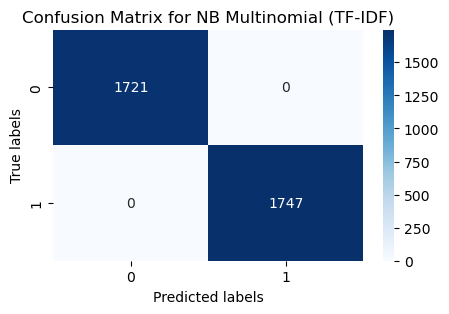

--- Prueba - NB Multinomial (TF-IDF) ---
Resultados para NB Multinomial (TF-IDF):
Accuracy: 0.9988479262672811
Precision: 0.9988839285714286
Recall: 0.998812351543943
F1-Score: 0.9988468104610765
AUC Score: 0.9999202920499292




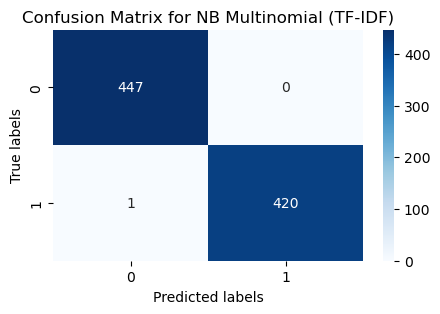

In [55]:
model_NB_2=validacion(MultinomialNB, best_params_NB_2, X_train_2, y_train, X_test_2, y_test, name="NB Multinomial (TF-IDF)")

#### **SVM**

--- Entrenamiento - SVC (TF-IDF) ({'kernel': 'linear', 'gamma': 1, 'C': 1, 'probability': True})---
Resultados para SVC (TF-IDF):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC Score: 1.0




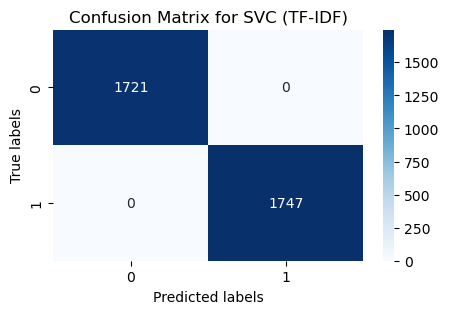

--- Prueba - SVC (TF-IDF) ---
Resultados para SVC (TF-IDF):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC Score: 1.0




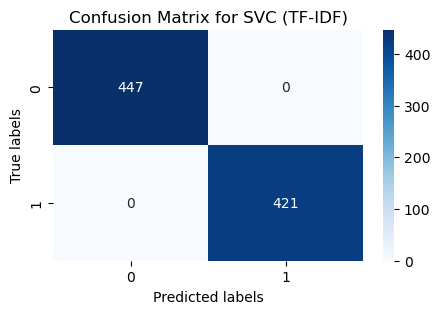

In [57]:
model_SVC_2=validacion(SVC, best_params_SVC_2, X_train_2, y_train, X_test_2, y_test, name="SVC (TF-IDF)")

## **5. Otras representaciones: synsets**

### **Detección de hiperónimos en synsets**
Vamos a crear un dataset aparte, donde los términos sean obtenidos a partir de **synsets** de los términos originales. Usaremos los synsets del paquete WordNet de la librería NLTK.
De esta forma, estamos intentando agrupar términos que tienen relación. Por ejemplo, podemos observar que las palabras "dollar" y "euro" pertenecen a la misma categoría: "monetary_unit". De hecho no tiene sentido tratarlos como palabras completamente distintas, como lo harían nuestros algoritmos de clasificación sin este procesamiento.

A este nuevo dataset le aplicaremos todo el preprocesamiento anterior, y compararemos los resultados con el dataset original

In [60]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def obtener_primer_hiperonimo(palabra):
    # Lematizamos la palabra antes de obtener los synsets
    palabra_lematizada = lemmatizer.lemmatize(palabra)
    
    # Obtenemos todos los synsets de la palabra lematizada
    synsets = wn.synsets(palabra_lematizada)

    #Verificar si hay al menos un synset
    if synsets:
        #Seleccionamos el primer synset
        primer_synset = synsets[0]

        #Obtenemos los hiperónimos del primer synset
        hiperonimos = primer_synset.hypernyms()

        # Verificar si el synset tiene hiperónimos
        if hiperonimos:
            # Seleccionar el primer hiperónimo y obtener el primer lema
            primer_hiperonimo = hiperonimos[0].lemmas()[0].name()
            return primer_hiperonimo
        else:
            return palabra #No hay hiperónimos así que dejamos la palabra inicial
    else:
        return palabra #No hay synsets así que dejamos la palabra inicial

# Ejemplo de uso de la función
palabra = "dollar"
hiperonimo = obtener_primer_hiperonimo(palabra)
print(f"El primer hiperónimo de '{palabra}' es: {hiperonimo}")

palabra = "euro"
hiperonimo = obtener_primer_hiperonimo(palabra)
print(f"El primer hiperónimo de '{palabra}' es: {hiperonimo}")

El primer hiperónimo de 'dollar' es: monetary_unit
El primer hiperónimo de 'euro' es: monetary_unit


In [61]:
def reemplazar_con_hiperonimos(frase):
    palabras = frase.split()
    palabras_con_hiperonimos = [obtener_primer_hiperonimo(palabra) for palabra in palabras]
    frase_transformada = ' '.join(palabras_con_hiperonimos)
    return frase_transformada

In [62]:
data_synsets=data_clean

In [63]:
data_synsets['Body'] = data_synsets['Body'].apply(reemplazar_con_hiperonimos)

In [64]:
data_synsets.head()

,Body,Label
0,achiever case season activity demonstration co...,1
1,motor_vehicle security magnitude_relation degr...,1
2,poverty attempt economical blood_sport leisure...,1
3,electronic_communication large_integer group l...,1
4,woman basic_cognitive_process informing person...,1


In [65]:
data_synsets=seleccion_caracteristicas(data_synsets)

[('achiever', 2632), ('case', 5275), ('season', 1591), ('activity', 20163), ('demonstration', 188), ('container', 2001), ('approval', 1508), ('use', 2966), ('condition', 2692), ('point', 7386), ('body_part', 1133), ('businessman', 132), ('direct', 221), ('mercantile_establishment', 300), ('region', 4066), ('inform', 2568), ('administrator', 579), ('effective', 278), ('dramatic_composition', 555), ('tells', 99), ('small_indefinite_quantity', 1814), ('prevention', 598), ('consumer', 346), ('large_integer', 3693), ('monetary_unit', 724), ('artwork', 132), ('paper', 1530), ('enterprise', 2406), ('kind', 9841), ('app', 48), ('Estonian_monetary_unit', 1953), ('advantage', 1712), ('table', 237), ('opportunity', 1385), ('code', 10166), ('institution', 882), ('move', 5535), ('administrative_unit', 2742), ('draft', 2097), ('negotiator', 210), ('get', 5193), ('travel', 3519), ('education', 4542), ('profitable', 162), ('idea', 7924), ('regular_payment', 1060), ('time_period', 8206), ('written_comm

In [66]:
X_train_synsets, X_test_synsets, y_train_synsets, y_test_synsets= division_datos(data_synsets)

In [67]:
#X_train_synsets_1, X_test_synsets_1, vectorizer_synsets_1= vectorizacion(X_train_synsets, X_test_synsets, "count")
X_train_synsets_2, X_test_synsets_2, vectorizer_synsets_2= vectorizacion(X_train_synsets, X_test_synsets, "tfidf")

**Realizamos los puntos 3 y 4 igual que antes, es decir, hacemos búsqueda de hiperparámetros y luego validamos el mejor modelo, pero únicamente para representación TF-IDF**

In [69]:
best_params_NB_synsets_2=busqueda_hiperparametros(param_grid_NB, MultinomialNB, X_train_synsets_2, y_train_synsets, "NB Multinomial Synsets (TF-IDF)")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ........................................

In [70]:
best_params_SVC_synsets_2=busqueda_hiperparametros(param_grid_SVC, SVC, X_train_synsets_2, y_train_synsets, "SVC Synsets (TF-IDF)")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   2.4s
[CV] END ..........................C=1, gamma=1,

In [71]:
print(f"""Hiperparámetros del mejor modelo para Naive Bayes Multinomial: 
    TfidfVectorizer: {best_params_NB_synsets_2}
    """)

print(f"""Hiperparámetros del mejor modelo para SVC: 
    TfidfVectorizer: {best_params_SVC_synsets_2}
    """)

Hiperparámetros del mejor modelo para Naive Bayes Multinomial: 
    TfidfVectorizer: {'alpha': 0.01}
    
Hiperparámetros del mejor modelo para SVC: 
    TfidfVectorizer: {'kernel': 'linear', 'gamma': 10, 'C': 10}
    


## **6. Comparaciones**
Realizamos comparaciones entre los resultados obtenidos por los dos clasificadores (NB Multinomial y SVM), con las dos representaciones (términos o synsets).

#### **Tabla comparativa con las métricas para cada modelo**

Mostraremos una tabla para entrenamiento y otra para test. Cada fila de la tabla representará las métricas para cada modelo.

In [75]:
def plot_roc_curve(y_test, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC - ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

In [76]:
#Función que devuelve todas las métricas para entrenamiento y para prueba
def validacion_train_test(algoritmo_clasificacion, parametros, X_train, y_train, X_test, y_test, name):
    print(f"\nValidando {name}")
    if algoritmo_clasificacion == SVC:
        parametros = parametros.copy()  # Copiar para no modificar el original externamente
        parametros['probability'] = True  # Habilitar la estimación de probabilidades
        
    #Reentrenamos el mejor modelo pero ahora sí con todo el conjunto de entrenamiento
    model = algoritmo_clasificacion(**parametros)
    model.fit(X_train, y_train)

    # Calibración del modelo para poder usar predict_proba en LinearSVC y en SGDClassifier
    if algoritmo_clasificacion == LinearSVC or algoritmo_clasificacion == SGDClassifier:
        model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
        model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_scores = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
    
    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='macro'),
        'Recall': recall_score(y_train, y_train_pred, average='macro'),
        'F1-Score': f1_score(y_train, y_train_pred, average='macro'),
        'AUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    }
    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='macro'),
        'Recall': recall_score(y_test, y_test_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_test_pred, average='macro'),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        #'y_scores': y_test_scores
    }

    # Plot ROC curve
    plot_roc_curve(y_test, y_test_scores, name)
    
    return train_metrics, test_metrics


Validando NB Multinomial


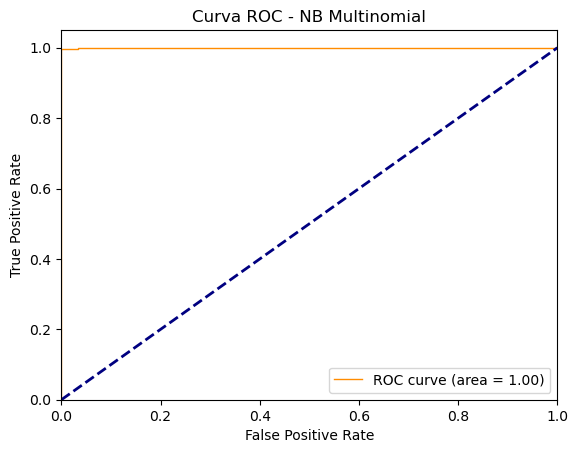


Validando NB Multinomial Synsets


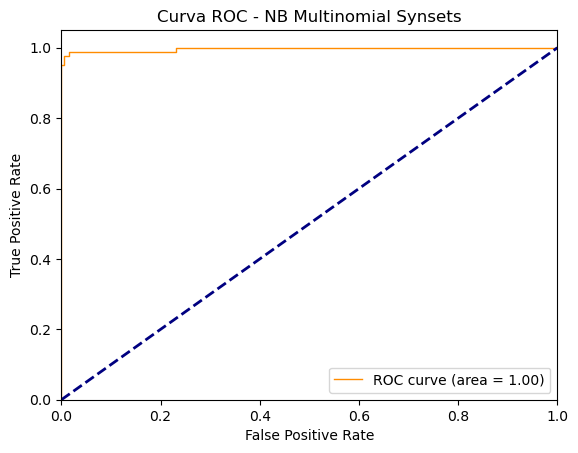


Validando SVC


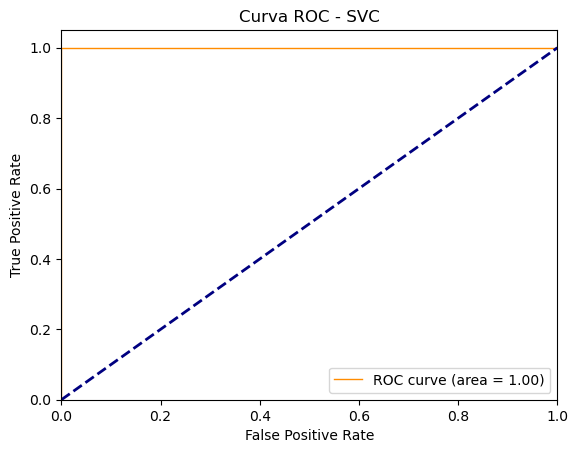


Validando SVC Synsets


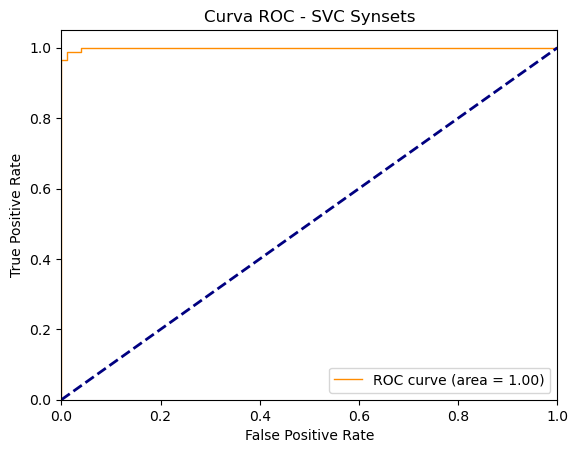

Training Metrics:
               Classifier  Accuracy  Precision  Recall  F1-Score  AUC
0          NB Multinomial       1.0        1.0     1.0       1.0  1.0
1  NB Multinomial Synsets       1.0        1.0     1.0       1.0  1.0
2                     SVC       1.0        1.0     1.0       1.0  1.0
3             SVC Synsets       1.0        1.0     1.0       1.0  1.0

Testing Metrics:
               Classifier  Accuracy  Precision    Recall  F1-Score       AUC
0          NB Multinomial  0.998848   0.998884  0.998812  0.998847  0.999920
1  NB Multinomial Synsets  0.990366   0.994331  0.969880  0.981621  0.996905
2                     SVC  1.000000   1.000000  1.000000  1.000000  1.000000
3             SVC Synsets  0.992293   0.995455  0.975904  0.985371  0.999254


In [77]:
columns = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
df_metrics_train = pd.DataFrame(columns=columns)
df_metrics_test = pd.DataFrame(columns=columns)

#Validar y recopilar métricas para NB Multinomial tf-idf
train_metrics_NB_2, test_metrics_NB_2 = validacion_train_test(MultinomialNB, best_params_NB_2, X_train_2, y_train, X_test_2, y_test, "NB Multinomial")
df_metrics_train = pd.concat([df_metrics_train, pd.DataFrame([['NB Multinomial'] + list(train_metrics_NB_2.values())], columns=columns)], ignore_index=True)
df_metrics_test = pd.concat([df_metrics_test, pd.DataFrame([['NB Multinomial'] + list(test_metrics_NB_2.values())], columns=columns)], ignore_index=True)

#Validar y recopilar métricas para NB Multinomial tf-idf con synsets
train_metrics_NB_synsets_2, test_metrics_NB_synsets_2 = validacion_train_test(MultinomialNB, best_params_NB_synsets_2, X_train_synsets_2, y_train_synsets, X_test_synsets_2, y_test_synsets, "NB Multinomial Synsets")
df_metrics_train = pd.concat([df_metrics_train, pd.DataFrame([['NB Multinomial Synsets'] + list(train_metrics_NB_synsets_2.values())], columns=columns)], ignore_index=True)
df_metrics_test = pd.concat([df_metrics_test, pd.DataFrame([['NB Multinomial Synsets'] + list(test_metrics_NB_synsets_2.values())], columns=columns)], ignore_index=True)

#Validar y recopilar métricas para SVC tf-idf
train_metrics_SVC_2, test_metrics_SVC_2 = validacion_train_test(SVC, best_params_SVC_2, X_train_2, y_train, X_test_2, y_test, "SVC")
df_metrics_train = pd.concat([df_metrics_train, pd.DataFrame([['SVC'] + list(train_metrics_SVC_2.values())], columns=columns)], ignore_index=True)
df_metrics_test = pd.concat([df_metrics_test, pd.DataFrame([['SVC'] + list(test_metrics_SVC_2.values())], columns=columns)], ignore_index=True)

#Validar y recopilar métricas para SVC tf-idf con synsets
train_metrics_SVC_synsets_2, test_metrics_SVC_synsets_2 = validacion_train_test(SVC, best_params_SVC_synsets_2, X_train_synsets_2, y_train_synsets, X_test_synsets_2, y_test_synsets, "SVC Synsets")
df_metrics_train = pd.concat([df_metrics_train, pd.DataFrame([['SVC Synsets'] + list(train_metrics_SVC_synsets_2.values())], columns=columns)], ignore_index=True)
df_metrics_test = pd.concat([df_metrics_test, pd.DataFrame([['SVC Synsets'] + list(test_metrics_SVC_synsets_2.values())], columns=columns)], ignore_index=True)

# Imprimir los DataFrames finales con todas las métricas
print("Training Metrics:")
print(df_metrics_train)
print("\nTesting Metrics:")
print(df_metrics_test)

### Curva ROC
También vamos a mostrar la gráfica de la curva ROC para todos los modelos entrenados

In [79]:
#Función para representar en una gráfica distintas curvas ROC, incluyendo la de un clasificador random
def plot_combined_roc_curves(y_tests, y_score_lists, model_names, title="Combined ROC Curves"):
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
    
    for i, y_scores in enumerate(y_score_lists):
        fpr, tpr, _ = roc_curve(y_tests[i], y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
                 label='ROC curve of {0} (area = {1:0.3f})'.format(model_names[i], roc_auc))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [80]:
#Función que devuelve las métricas necesarias para representar la curva ROC
def validacion_curvaROC(algoritmo_clasificacion, parametros, X_train, y_train, X_test, y_test, name):
    print(f"\nValidando {name}")
    if algoritmo_clasificacion == SVC:
        parametros = parametros.copy()  # Copiar para no modificar el original externamente
        parametros['probability'] = True  # Habilitar la estimación de probabilidades
        
    #Reentrenamos el mejor modelo pero ahora sí con todo el conjunto de entrenamiento
    model = algoritmo_clasificacion(**parametros)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_scores = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
    
    return y_test_scores


Validando NB Multinomial

Validando NB Multinomial Synsets

Validando SVC

Validando SVC Synsets


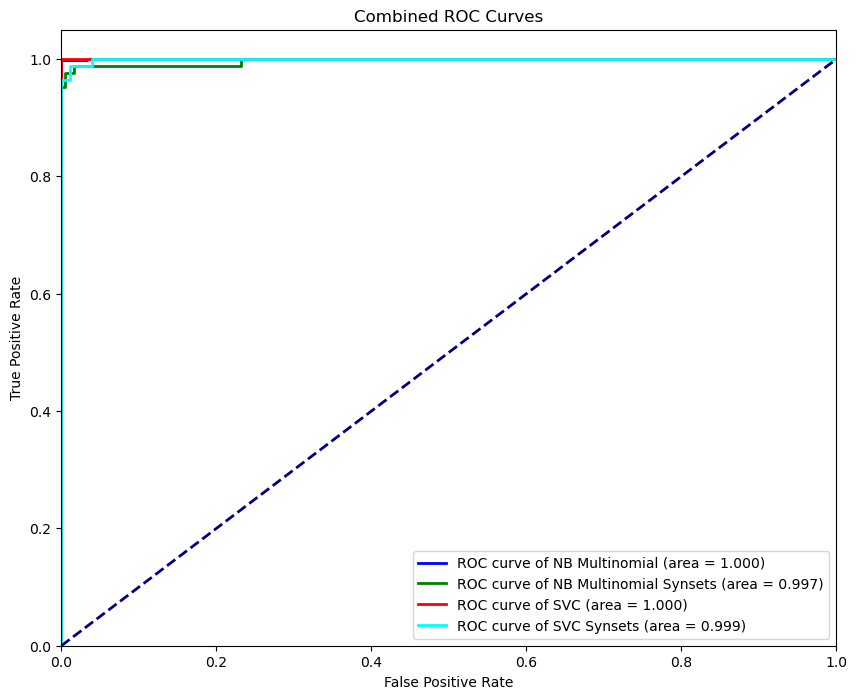

In [81]:
model_list = [(MultinomialNB, best_params_NB_2, "NB Multinomial", ""),
              (MultinomialNB, best_params_NB_synsets_2, "NB Multinomial Synsets", "synsets"),
              (SVC, best_params_SVC_2, "SVC", ""),
              (SVC, best_params_SVC_synsets_2, "SVC Synsets", "synsets"),
             ]

y_tests = []
y_scores = []
model_names = []

for model, params, name, type in model_list:
    if type=="synsets":
        y_test_scores = validacion_curvaROC(model, params, X_train_synsets_2, y_train_synsets, X_test_synsets_2, y_test_synsets, name)
        y_tests.append(y_test_synsets)
    else:
        y_test_scores = validacion_curvaROC(model, params, X_train_2, y_train, X_test_2, y_test, name)
        y_tests.append(y_test)
        
    y_scores.append(y_test_scores) 
    model_names.append(name)

plot_combined_roc_curves(y_tests, y_scores, model_names)

Observamos que todos los modelos obtienen métricas casi perfectas, y la curva ROC también se aproxima a la de un clasificador perfecto en todos los casos